In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


In [3]:
import os
ir=pd.read_csv(os.path.join(path, "Iris.csv"))
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
ir.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
X=ir[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=ir["Species"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [8]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


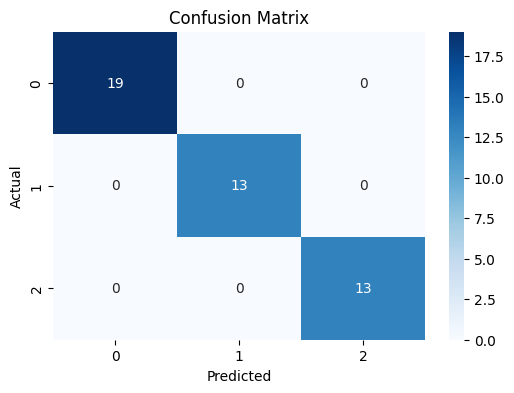

In [10]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
print("\n--- Predict species from user input ---")
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width  = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width  = float(input("Enter petal width (cm): "))
user_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
user_pred = model.predict(user_data)
print("\nPredicted species:", user_pred[0])


--- Predict species from user input ---
Enter sepal length (cm): 10
Enter sepal width (cm): 10
Enter petal length (cm): 10
Enter petal width (cm): 10

Predicted species: Iris-virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [22]:
import pickle   # add at the top of your file (with other imports)

# Save model to pkl file
with open("svm_iris_model.pkl", "wb") as f:
    pickle.dump(model, f)

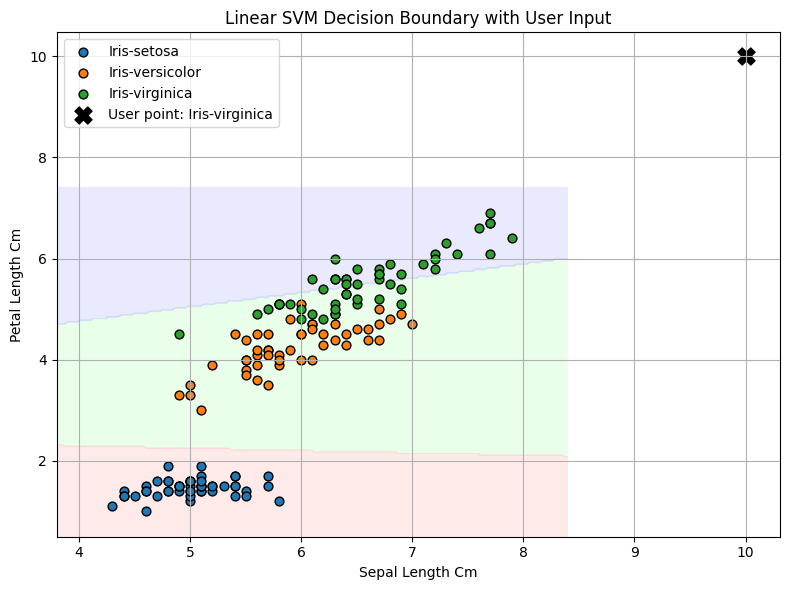

In [23]:

from matplotlib.colors import ListedColormap

# Define the features to be used for plotting the 2D decision boundary
plot_feature_x = "SepalLengthCm"
plot_feature_y = "PetalLengthCm"

# Get the ranges for the plotting features
x_min, x_max = X[plot_feature_x].min() - 0.5, X[plot_feature_x].max() + 0.5
y_min, y_max = X[plot_feature_y].min() - 0.5, X[plot_feature_y].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# To predict for the 2D grid, we need to create a 4-feature input for the model
# We will use the mean values for the features not being plotted.
mean_sepal_width = X["SepalWidthCm"].mean()
mean_petal_width = X["PetalWidthCm"].mean()

# Create a DataFrame for prediction on the grid points
# Ensure the order of columns matches the training data (X)
grid_data = pd.DataFrame({
    "SepalLengthCm": xx.ravel(),
    "SepalWidthCm": np.full_like(xx.ravel(), mean_sepal_width),
    "PetalLengthCm": yy.ravel(),
    "PetalWidthCm": np.full_like(xx.ravel(), mean_petal_width),
})

Z_str = model.predict(grid_data)

# Map string labels to numerical values for plotting with contourf
# Get unique species labels and create a numerical mapping from the original species column
unique_species = ir['Species'].unique()
species_to_int = {species: i for i, species in enumerate(unique_species)}

Z_numerical = np.array([species_to_int[s] for s in Z_str.flatten()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Decision regions
cmap = ListedColormap(["#FFCCCC", "#CCFFCC", "#CCCCFF"])
plt.contourf(xx, yy, Z_numerical, alpha=0.4, cmap=cmap)

# Training points
for species in ir['Species'].unique():
    mask = (ir['Species'] == species)
    plt.scatter(
        X.loc[mask, plot_feature_x],
        X.loc[mask, plot_feature_y],
        s=40,
        edgecolor="k",
        label=species
    )

# User input point
plt.scatter(
    sepal_length, # This corresponds to plot_feature_x
    petal_length, # This corresponds to plot_feature_y
    color="black",
    marker="X",
    s=150,
    label=f"User point: {user_pred[0]}"
)

plt.xlabel(f"{plot_feature_x.replace('Cm', ' Cm').replace('Sepal', 'Sepal ').replace('Petal', 'Petal ')}") # Adjusted for proper display
plt.ylabel(f"{plot_feature_y.replace('Cm', ' Cm').replace('Sepal', 'Sepal ').replace('Petal', 'Petal ')}") # Adjusted for proper display
plt.title("Linear SVM Decision Boundary with User Input")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()